# PH 354 - HW 2
## Atharv Sagar Suryawanshi

In [ ]:
# relevant modules
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### Exercise 1
#### a)

In [2]:
def function(x):
    return x**4 - 2*x + 1

def integrate_trapezoid(a, b, n_slices):
    x_vals = np.linspace(a, b, n_slices+1) # n+1 points
    h = (b-a)/n_slices
    return h/2*(np.sum(2*function(x_vals[1:-1])) + function(x_vals[0]) + function(x_vals[-1]))
    
print("Trapezoid integration yields:",integrate_trapezoid(0, 2, 10))
print(f"Fractional error of trapezoid integration is {abs(4.4 - integrate_trapezoid(0, 2, 10))/4.4:.3f}")

Trapezoid integration yields: 4.50656
Fractional error of trapezoid integration is 0.024


#### b)

In [3]:
def integrate_simpsons(a, b, n_slices):
    x_vals = np.linspace(a, b, n_slices + 1)
    h = (b - a)/(n_slices)
    x1_indices = np.arange(1, n_slices, 2)
    x2_indices = np.arange(2, n_slices, 2)
    I = h/3*(function(x_vals[0]) + function(x_vals[-1]) 
            + 4*np.sum(function(x_vals[x1_indices])) 
            + 2*np.sum(function(x_vals[x2_indices])))
    return I
print(integrate_simpsons(0,2,10))
print(f"Fractional error of Simpson's rule integration is {abs(4.4 - integrate_simpsons(0, 2, 10))/4.4}")
print("Thus Simpsons Rule is much better integration method than Trapezoid.")

4.400426666666667
Fractional error of Simpson's rule integration is 9.696969696972666e-05
Thus Simpsons Rule is much better integration method than Trapezoid.


#### c)

In [4]:
print("Comparing methods for 100 and 1000 slices")
print("Trapezoid integration yields:",integrate_trapezoid(0, 2, 100))
print("Simpsons integration yields:",integrate_simpsons(0, 2, 100))

print("Trapezoid integration yields:",integrate_trapezoid(0, 2, 1000))      
print("Simpsons integration yields:",integrate_simpsons(0, 2, 1000))
print("Simpsons rule is much better than Trapezoid rule for integration.")  

Comparing methods for 100 and 1000 slices
Trapezoid integration yields: 4.401066656
Simpsons integration yields: 4.400000042666668
Trapezoid integration yields: 4.400010666665601
Simpsons integration yields: 4.400000000004267
Simpsons rule is much better than Trapezoid rule for integration.


#### d)

In [5]:
def integrate_trapezoid_with_error(a, b, n_slices):
    x_vals = np.linspace(a, b, n_slices+1) # n+1 points
    h = (b-a)/n_slices
    I = h/2*(np.sum(2*function(x_vals[1:-1])) + function(x_vals[0]) + function(x_vals[-1]))
    error = (b -a)**3/n_slices**2
    return I, error
print(integrate_trapezoid_with_error(0, 2, 20))
print(integrate_trapezoid_with_error(0, 2, 10))

ch2 = 1/3*(integrate_trapezoid_with_error(0, 2, 20)[0] - integrate_trapezoid_with_error(0, 2, 10)[0])
abs_error = abs(4.4 - integrate_trapezoid_with_error(0, 2, 20)[0])
print(f"ch2 error is {ch2} and absolute error is {abs_error}")  


(4.426660000000001, 0.02)
(4.50656, 0.08)
ch2 error is -0.026633333333333137 and absolute error is 0.026660000000000572


The difference in the between error calculation exists because of our assumption that error is of the order $O(h^2)$ while the existance of higher order terms is ignored. 
### Exercise 2
#### a)

In [6]:
def function(x):
    return np.sin((100*x)**0.5)**2

def integrate_trapezoid(a, b, n_slices):
    x_vals = np.linspace(a, b, n_slices+1) # n+1 points
    h = (b-a)/n_slices
    return h*(np.sum(function(x_vals[1:-1])) + 0.5*function(x_vals[0]) + 0.5*function(x_vals[-1]))

def adaptive_trapezoid(a, b, error_tol):
    slice = 1
    I_old = integrate_trapezoid(a, b, slice)
    print(f"For slice: {slice}, Integral = {I_old}")
    while True:
        slice *= 2
        I_new = integrate_trapezoid(a, b, slice)
        estimate_error = abs(I_new - I_old)/3 # richardson extrapolation 
        print(f"For slice: {slice}, Integral = {I_new}, error estimate: {estimate_error}")
        if estimate_error < error_tol:
            break
        I_old = I_new
    return I_new, slice, estimate_error

I, slices, error = adaptive_trapezoid(0, 1, 1E-6)
# print(I, slices, error)

For slice: 1, Integral = 0.147979484546652
For slice: 2, Integral = 0.3252319078064746, error estimate: 0.05908414108660753
For slice: 4, Integral = 0.5122828507233315, error estimate: 0.06235031430561896
For slice: 8, Integral = 0.40299744847824825, error estimate: 0.036428467415027734
For slice: 16, Integral = 0.43010336929474696, error estimate: 0.009035306938832902
For slice: 32, Integral = 0.4484146657874699, error estimate: 0.0061037654975743165
For slice: 64, Integral = 0.45391293121537585, error estimate: 0.0018327551426353117
For slice: 128, Integral = 0.4553485043728022, error estimate: 0.00047852438580879103
For slice: 256, Integral = 0.45571126645324106, error estimate: 0.00012092069347961291
For slice: 512, Integral = 0.4558021996516641, error estimate: 3.0311066141005167e-05
For slice: 1024, Integral = 0.4558249481324202, error estimate: 7.582826918706154e-06
For slice: 2048, Integral = 0.45583063620164616, error estimate: 1.896023075320663e-06
For slice: 4096, Integral =

#### b)

In [7]:
def romberg_integrate(a, b, error_tol, max_iters = 20):
    slice = 1
    R = np.zeros((max_iters, max_iters))
    R[0, 0] = integrate_trapezoid(a, b, slice)
    # print(f"For N:{slice} , R[0,0]: {R[0, 0]}")
    for k in range(1, max_iters):
        slice *=  2
        R[k, 0] = integrate_trapezoid(a, b, slice) 
        for m in range(1, k+1): # 1 to k
            R[k, m] = R[k, m-1] + (R[k, m-1] - R[k-1, m-1])/(4**m - 1)
        error = abs(R[k, k] - R[k-1, k-1])
        print(f"N = {slice}, R({k},{k}) = {R[k, k]:.10f}, Error = {error:.10e}")
        if error < error_tol:
            print("\nFinal Result:")
            print(f"Integral = {R[k, k]:.10f}, achieved with N = {slice} intervals")
            return R[:k+1,:k+1]
    print("Max iter reached without acheving required accuracy")

romberg_integrate(0, 1, 1E-6, 10)

N = 2, R(1,1) = 0.3843160489, Error = 2.3633656435e-01
N = 4, R(2,2) = 0.5873209728, Error = 2.0300492388e-01
N = 8, R(3,3) = 0.3489738619, Error = 2.3834711091e-01
N = 16, R(4,4) = 0.4458037647, Error = 9.6829902853e-02
N = 32, R(5,5) = 0.4557774922, Error = 9.9737275203e-03
N = 64, R(6,6) = 0.4558324945, Error = 5.5002230282e-05
N = 128, R(7,7) = 0.4558325323, Error = 3.7843635114e-08

Final Result:
Integral = 0.4558325323, achieved with N = 128 intervals


array([[0.14797948, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.32523191, 0.38431605, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.51228285, 0.57463317, 0.58732097, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.40299745, 0.36656898, 0.35269804, 0.34897386, 0.        ,
        0.        , 0.        , 0.        ],
       [0.43010337, 0.43913868, 0.44397666, 0.44542552, 0.44580376,
        0.        , 0.        , 0.        ],
       [0.44841467, 0.45451843, 0.45554375, 0.45572735, 0.45576775,
        0.45577749, 0.        , 0.        ],
       [0.45391293, 0.45574569, 0.4558275 , 0.45583201, 0.45583242,
        0.45583248, 0.45583249, 0.        ],
       [0.4553485 , 0.45582703, 0.45583245, 0.45583253, 0.45583253,
        0.45583253, 0.45583253, 0.45583253]])

#### c) 

In [8]:
def integrate_simpsons(a, b, n_slices):
    x_vals = np.linspace(a, b, n_slices + 1)
    h = (b - a)/(n_slices)
    x1_indices = np.arange(1, n_slices, 2)
    x2_indices = np.arange(2, n_slices, 2)
    I = h/3*(function(x_vals[0]) + function(x_vals[-1]) 
            + 4*np.sum(function(x_vals[x1_indices])) 
            + 2*np.sum(function(x_vals[x2_indices])))
    return I

def adaptive_simpsons(a, b, error_tol):
    slice = 1
    I_old = integrate_simpsons(a, b, slice)
    print(f"For slice: {slice}, Integral = {I_old}")
    while True:
        slice *= 2
        I_new = integrate_simpsons(a, b, slice)
        estimate_error = abs(I_new - I_old)/3 # richardson extrapolation 
        print(f"For slice: {slice}, Integral = {I_new}, error estimate: {estimate_error}")
        if estimate_error < error_tol:
            break
        I_old = I_new
    return I_new, slice, estimate_error

def romberg_simpsons(a, b, error_tol, max_iters = 20):
    slice = 1
    R = np.zeros((max_iters, max_iters))
    R[0, 0] = integrate_simpsons(a, b, slice)
    # print(f"For N:{slice} , R[0,0]: {R[0, 0]}")
    for k in range(1, max_iters):
        slice *=  2
        R[k, 0] = integrate_simpsons(a, b, slice) 
        for m in range(1, k+1): # 1 to k
            R[k, m] = R[k, m-1] + (R[k, m-1] - R[k-1, m-1])/(4**m - 1)
        error = abs(R[k, k] - R[k-1, k-1])
        print(f"N = {slice}, R({k},{k}) = {R[k, k]:.10f}, Error = {error:.10e}")
        if error < error_tol:
            print("\nFinal Result:")
            print(f"Integral = {R[k, k]:.10f}, achieved with N = {slice} intervals")
            return R[:k+1,:k+1]
    print("Max iter reached without acheving required accuracy")


I, slice, error = adaptive_simpsons(0, 1, 1e-6)

print("\n \n")

romberg_simpsons(0, 1, 1e-6)

For slice: 1, Integral = 0.09865298969776799
For slice: 2, Integral = 0.38431604889308213, error estimate: 0.09522101973177138
For slice: 4, Integral = 0.5746331650289502, error estimate: 0.06343903871195604
For slice: 8, Integral = 0.36656898106322056, error estimate: 0.06935472798857656
For slice: 16, Integral = 0.4391386762335799, error estimate: 0.024189898390119775
For slice: 32, Integral = 0.4545184312850443, error estimate: 0.005126585017154813
For slice: 64, Integral = 0.45574568635801116, error estimate: 0.00040908502432227917
For slice: 128, Integral = 0.45582702875861086, error estimate: 2.7114133533234774e-05
For slice: 256, Integral = 0.4558321871467207, error estimate: 1.7194627032757204e-06
For slice: 512, Integral = 0.45583251071780506, error estimate: 1.0785702812358504e-07

 

N = 2, R(1,1) = 0.4795370686, Error = 3.8088407893e-01
N = 4, R(2,2) = 0.6486412127, Error = 1.6910414412e-01
N = 8, R(3,3) = 0.2685514877, Error = 3.8008972500e-01
N = 16, R(4,4) = 0.4783957809

array([[0.09865299, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.38431605, 0.47953707, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.57463317, 0.6380722 , 0.64864121, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.36656898, 0.29721425, 0.27449039, 0.26855149, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.43913868, 0.46332857, 0.47440286, 0.47757608, 0.47839578,
        0.        , 0.        , 0.        , 0.        ],
       [0.45451843, 0.45964502, 0.45939945, 0.4591613 , 0.45908908,
        0.45907021, 0.        , 0.        , 0.        ],
       [0.45574569, 0.45615477, 0.45592209, 0.45586689, 0.45585397,
        0.45585081, 0.45585002, 0.        , 0.        ],
       [0.45582703, 0.45585414, 0.4558341 , 0.4558327 , 0.45583257,
        0.45583255, 0.45583254, 0.45583254, 0.        ],


### Exercise 3 same as 2 wtf!

### Exercise 4: Period of an anharmonic oscillator
#### a)
$$T=\int_{0}^a \sqrt{ \frac{8m}{E-V(x)} } \, dx $$
$$T=\sqrt{ \frac{8ma^2}{V(a)} }$$

#### b) $$T=\int_{0}^a \sqrt{ \frac{8}{a^4-x^4} } \, dx $$
Now, for $x = au$, we get $$T = \frac{\sqrt{8}}{a} \int_{0}^1 \frac{1}{\sqrt{1-u^4}}\,du$$

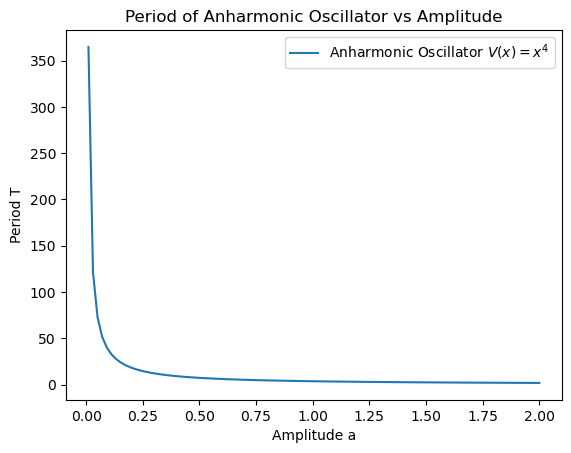

In [9]:
# making legendre polynomials
def legendre_poly(degree, x):
    if degree == 0: return 1
    elif degree == 1: return x
    Pm_2, Pm_1 = 1, x
    for m in range(2, degree+1):
        Pm = ((2*m - 1)*x*Pm_1 - (m-1)*Pm_2)/m
        Pm_2, Pm_1 = Pm_1, Pm
    return Pm

def legende_derivative(degree, x):
    return degree/(x**2-1) * (x* legendre_poly(degree,x) - legendre_poly(degree-1, x))

def gauss_quad_weights(n):
    """ Compute roots of P_n"""
    x = np.cos(np.pi * (np.arange(1, n+1) - 0.25)/(n+0.5)) # initial guess
    # using newtons method to find roots
    for _ in range(10): 
        Pn = np.array([legendre_poly(n, xi) for xi in x])
        Pn_prime = np.array([legende_derivative(n, xi) for xi in x])
        x -= Pn/Pn_prime
    w = 2 / ((1-x**2) * (Pn_prime**2))
    return x, w

def gaussian_quad_integrate(f, n):
    x, w = gauss_quad_weights(n)
    # change from -1,1 to 0,1
    x_new = (x+1)/2 
    w_new = w/2
    return np.sum(w_new*f(x_new))

def period_oscillator(a, nos_points = 20):
    if a == 0: return 0
    f = lambda u: 1/np.sqrt(1-u**4)
    I = gaussian_quad_integrate(f, nos_points)
    T = np.sqrt(8)/a*I  
    return T

# Compute and plot period for amplitudes a in [0, 2]
a_values = np.linspace(0.01, 2, 100)  # Avoid division by zero at a=0
T_values = np.array([period_oscillator(a) for a in a_values])

plt.plot(a_values, T_values, label='Anharmonic Oscillator $V(x) = x^4$')
plt.xlabel('Amplitude a')
plt.ylabel('Period T')
plt.title('Period of Anharmonic Oscillator vs Amplitude')
plt.legend()
# plt.grid()
plt.show()



#### c) explain: force due to potential is very less closer to zero, causing the particle to barely accelerate. 

###  Exercise 5: Gravitational pull of a uniform sheet
#### a) 
Gravitational potential due to small sheet element $dx dy$  at a distance of $z$ is given by:
$$V(x,y) = \frac{G\sigma dxdy}{(x^2+y^2+z^2)^{1/2}}$$
Force in $z$ direction is given by $F_{z}=-dV/dz$, 
$$F_{z}(x,y)=\frac{G\sigma zdxdy}{(x^2+y^2+z^2)^{3/2}}$$
Now, to calculate the total force due to the plate in $z$ direction, we integrate $x$ and $y$ over the length of sheet. 
$$F_{z} = \int \int_{-L/2}^{L/2}  \,   \, \frac{G\sigma z}{(x^2+y^2+z^2)^{3/2}} dxdy $$

#### b)
Here, let $aL/2 = x$, $bL/2 = y$ 
$$F_{z} = \frac{2}{L}\int \int_{-1}^{1}  \,   \, \frac{G\sigma z}{(a^2+b^2+z^2)^{3/2}} dadb $$

In [10]:
G = 6.674e-11
sigma = 10e3/100 # 10 metric tonne per 100m2

def gaussian_quad_integrate(f, n):
    a, w_a = gauss_quad_weights(n)
    b, w_b = gauss_quad_weights(n)
    return np.sum(w_a*w_b*f(a,b))

def gravitational_force(z, nos_points= 100):
    f = lambda a,b: z/(a**2 + b**2+ z**2)**1.5
    I = gaussian_quad_integrate(f, nos_points)
    F = 1/5*G*sigma*I
    return F

z_values = np.linspace(0, 10, 100)
F_values = np.array([gravitational_force(z) for z in z_values])


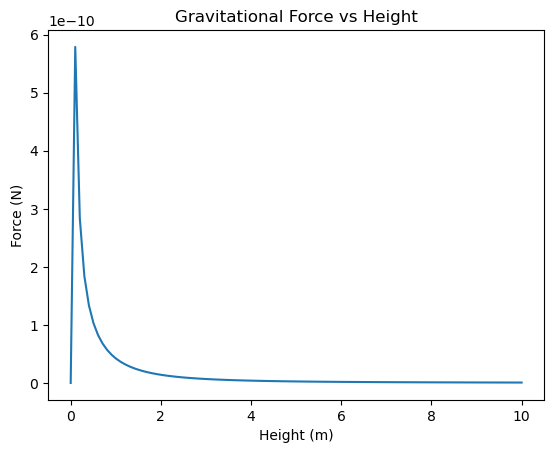

In [11]:
plt.figure()
plt.plot(z_values, F_values)
plt.xlabel('Height (m)')
plt.ylabel('Force (N)')   
plt.title('Gravitational Force vs Height')  
plt.show()

#### c)
Artifact caz, function suddenly goes to zero at z=0, to remove this ...(think)

### Exercise 6: Diffraction gratings
#### a)
The function $\sin^2{x}$ is periodic over $\pi$, thus, we get seperation of slits $d$ as 
$$\sin^2{\alpha u}=\sin^2{\alpha(u+d)}$$
$$\alpha(u+d)=\alpha u+\pi$$
$$d=\frac{\pi}{\alpha}$$ 

#### b)

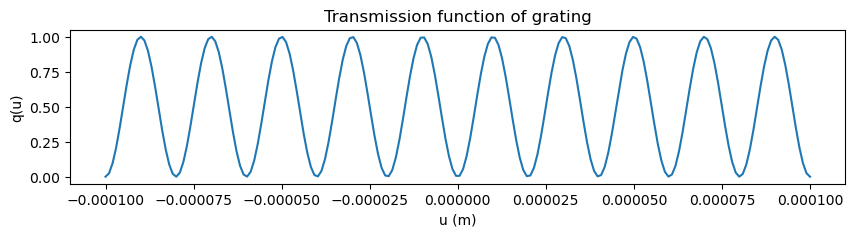

In [17]:
def q(u):
    alpha = np.pi/20e-6 # 20 mu m
    return np.sin(alpha*u)**2

x = np.linspace(-5*20e-6, 5*20e-6, 200)
plt.figure(figsize=(10,2))
plt.plot(x, q(x)) 
plt.xlabel('u (m)') 
plt.ylabel('q(u)')  
plt.title('Transmission function of grating')   
plt.show()


#### c)

In [18]:
def gaussian_quad(f, n):
    wide = 20e-6 * 5
    u, w = gauss_quad_weights(n)
    # change u from -1,1 to -wide/2 to wide/2
    u_new = wide/2 * u
    w_new = wide/2 * w
    return np.sum(w_new * np.array([f(ui) for ui in u_new]))


from cmath import exp, pi

def intensity(x, nos_points=100):
    f_len = 1
    wavelength = 500e-9 # 500 nm
    f = lambda u: q(u)*exp(complex(0, 1)*2*np.pi*x*u/ wavelength/ f_len)
    I = np.abs(10 * gaussian_quad(f, nos_points))**2
    return I

x_values = np.linspace(-5e-2, 5e-2, 1000)
I_values = np.array([intensity(x) for x in x_values])


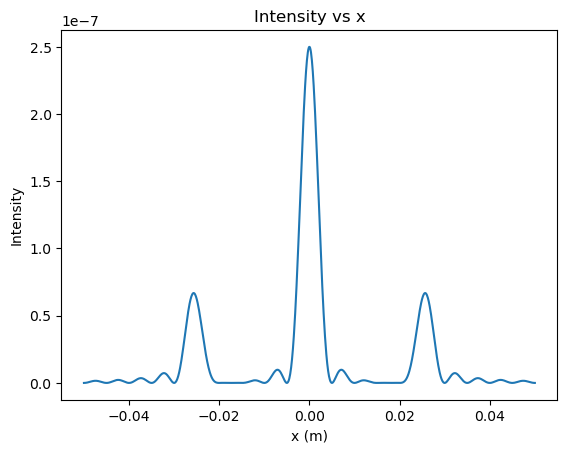

In [23]:
# plt.figure(figsize=(20,5))
plt.plot(x_values, I_values)
plt.xlabel('x (m)')
plt.ylabel('Intensity')
plt.title('Intensity vs x')
plt.show()

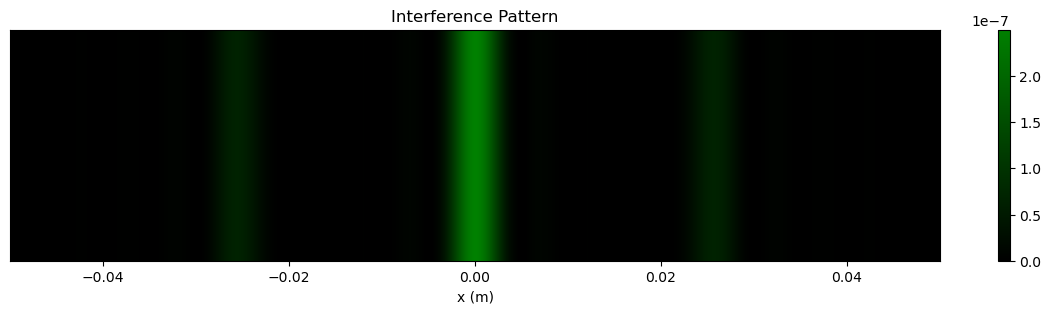

In [ ]:
I_matrix = np.tile(I_values, (100, 1)) # making 2D array
custom_cmap = mcolors.LinearSegmentedColormap.from_list("RedBlack", ["black", "green"])
plt.figure(figsize=(15, 3))
plt.imshow(I_matrix , cmap=custom_cmap , aspect='auto', extent=[x_values.min(), x_values.max(), 0, 1]) # type: ignore
plt.xlabel('x (m)')
plt.yticks([])  
plt.title('Interference Pattern')
plt.colorbar()
plt.show()

#### e) 

In [ ]:
def q_new(u):
    alpha = np.pi/20e-6 # 20 mu m
    beta = alpha/2
    

###  Exercise 7: Differentiating by integrating
